# Introducción a geopandas y cartoframe


In [1]:
#!pip3 install pandas
#!pip3 install geopandas
#!pip3 install geopy
#!pip3 install matplotlib


In [2]:
import pandas as pd
import geopandas as gpd
from geopy.distance import distance
from shapely.geometry import Point
import matplotlib.pyplot as plt

%matplotlib inline

### Pasar de DataFrame a GeoDataFrame

In [3]:
df = pd.read_csv('data/usa-latlong.csv')
print(f'Tipo: {type(df)}')
df.head()

Tipo: <class 'pandas.core.frame.DataFrame'>


,latitude,longitude
0,34.537094,-82.630303
1,35.025700,-78.970500
2,39.151817,-77.163810
3,38.636738,-121.319550
4,47.616955,-122.348921


In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
print(f'Tipo: {type(gdf)}')
gdf.head()

Tipo: <class 'geopandas.geodataframe.GeoDataFrame'>


,latitude,longitude,geometry
0,34.537094,-82.630303,POINT (-82.63030 34.53709)
1,35.025700,-78.970500,POINT (-78.97050 35.02570)
2,39.151817,-77.163810,POINT (-77.16381 39.15182)
3,38.636738,-121.319550,POINT (-121.31955 38.63674)
4,47.616955,-122.348921,POINT (-122.34892 47.61695)


Geopandas tiene 3 clases básicas de geometrías:
- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

In [5]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


http://geopandas.org/geometric_manipulations.html

### Atributos y métodos de gdf
http://geopandas.org/data_structures.html

.bounds
devuelve las coordenadas mínimas y máximas de cada eje

In [7]:
cities.bounds.head()

,minx,miny,maxx,maxy
0,12.453387,41.903282,12.453387,41.903282
1,12.441770,43.936096,12.441770,43.936096
2,9.516669,47.133724,9.516669,47.133724
3,6.130003,49.611660,6.130003,49.611660
4,158.149974,6.916644,158.149974,6.916644


In [8]:
world.bounds.head()

,minx,miny,maxx,maxy
0,-180.000000,-18.287990,180.000000,-16.020882
1,29.339998,-11.720938,40.316590,-0.950000
2,-17.063423,20.999752,-8.665124,27.656426
3,-140.997780,41.675105,-52.648099,83.233240
4,-171.791111,18.916190,-66.964660,71.357764


.area

In [9]:
world['area_proj_ud'] = world.area
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area_proj_ud
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921


### Common CRS parameters (and their PROJ.4 names):

- datum (datum)
- ellipse (ellps)
- projection (proj)
  - the name of the projected coordinate system, such as Albers Equal Area (aea) or Lambert Conformal Conic (lcc)
- standard parallels (lat_1, lat_2)
  - where the projection surface touches the globe - at the standard parallels, the projection shows no distortion
- central meridian and latitude of origin (lon_0, lat_0)
  - the origin of the projection's x and y coordinates (eastings and northings) - usually the center of the map projection
- false easting and false northing (x_0, y_0)
  - offsets to add to all your eastings and northings - usually used to make all the coordinates on the map positive numbers by starting 0,0 at the lower left corner rather than the center of the map (see false origin, above)

### Common projection types:

- *equal area* projections: maintain area at the expense of shape, distance, and direction - such as the [Albers Equal Area](https://en.wikipedia.org/wiki/Albers_projection) projection
- *conformal* projections: maintain shapes at the expense of area, distance, and direction - such as the [Lambert Conformal Conic](https://en.wikipedia.org/wiki/Lambert_conformal_conic_projection) projection
- *equidistant* projections: [preserve distance](https://en.wikipedia.org/wiki/Map_projection#Equidistant) from one point or along all meridians and parallels
- *azimuthal* projections: maintain direction from one point to all other points - such as an [orthographic](https://en.wikipedia.org/wiki/Orthographic_projection_in_cartography) projection
- others compromise to minimize overall distortion or aim for aesthetic value - such as the [Robinson](https://en.wikipedia.org/wiki/Robinson_projection) projection

In [10]:
wgs84 = {'proj': 'utm',
         'zone': 33,
         'ellps': 'WGS84',
         'datum': 'WGS84',
         'units': 'm',
         'no_defs': True}

world = world.to_crs(wgs84)
world['area_km²'] = world.area /1e9
world.head()

/home/ovi/.local/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area_proj_ud,area_km²
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((2120154.043 -18159883.625, 211...",1.639511,20.805019
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((2642708.049 -111032.647, 2662511.563...",76.301964,1053.472802
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-1872216.092 3295343.161, -1873749.6...",8.603984,116.705933
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-2519352.157 13653580.842, -25...",1712.995228,13264.229868
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-2519352.157 13653580.842, -27...",1122.281921,18100.196716


Cálculo de distancias
https://geopy.readthedocs.io/en/stable/index.html#module-geopy.distance

In [11]:
gdf.head()

,latitude,longitude,geometry
0,34.537094,-82.630303,POINT (-82.63030 34.53709)
1,35.025700,-78.970500,POINT (-78.97050 35.02570)
2,39.151817,-77.163810,POINT (-77.16381 39.15182)
3,38.636738,-121.319550,POINT (-121.31955 38.63674)
4,47.616955,-122.348921,POINT (-122.34892 47.61695)


In [12]:
def get_distance(row):
    white_house = 38.8976897, -77.0367014
    dist = distance(white_house, (row.latitude, row.longitude)).km
    return round(dist, 2)

gdf['km_from_WH'] = gdf.apply(get_distance, axis=1)
gdf.head()

,latitude,longitude,geometry,km_from_WH
0,34.537094,-82.630303,POINT (-82.63030 34.53709),695.34
1,35.025700,-78.970500,POINT (-78.97050 35.02570),462.89
2,39.151817,-77.163810,POINT (-77.16381 39.15182),30.28
3,38.636738,-121.319550,POINT (-121.31955 38.63674),3809.86
4,47.616955,-122.348921,POINT (-122.34892 47.61695),3747.18


Matplotlib

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world.continent=='North America']
north_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."


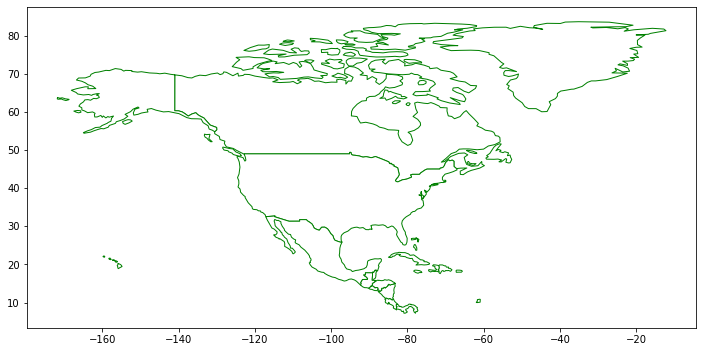

In [14]:
north_america.plot(color='white',
                        edgecolor='g',
                        figsize=(12,8))

In [15]:
north_america_df = pd.DataFrame({
    'city': ['Juneau', 'Nassau', 'Belmopan', 'Ottawa', 'San Jose', 'Havana',
             'Santo Domingo', 'Nuuk', 'Kingston', 'Mexico City',
             'Washington, D.C.'],
    'country': ['Alaska', 'Bahamas', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                'Dominican Republic', 'Greenland', 'Jamaica', 'Mexico',
                'United States of America'],
    'latitude': [58.30, 9.93, 17.97, 45.41, 17.25, 25.08,
              23.13, 64.18, 18.47, 38.90, 19.44],
    'longitude': [-134.42, -84.08, -76.76, -75.70, -88.76, -77.35,
                 -82.36, -51.72, -69.90, -77.01, -99.13]
})

north_america_df['coordinates'] = list(zip(north_america_df['longitude'],
                                           north_america_df['latitude']))

north_america_df['coordinates'] = north_america_df['coordinates'].apply(Point)

north_america_capital_cities = gpd.GeoDataFrame(north_america_df, geometry='coordinates')

north_america_capital_cities.head()

,city,country,latitude,longitude,coordinates
0,Juneau,Alaska,58.30,-134.42,POINT (-134.42000 58.30000)
1,Nassau,Bahamas,9.93,-84.08,POINT (-84.08000 9.93000)
2,Belmopan,Belize,17.97,-76.76,POINT (-76.76000 17.97000)
3,Ottawa,Canada,45.41,-75.70,POINT (-75.70000 45.41000)
4,San Jose,Costa Rica,17.25,-88.76,POINT (-88.76000 17.25000)


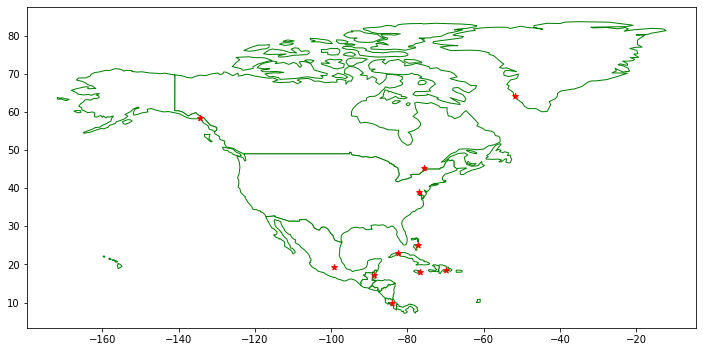

In [16]:
ax = north_america.plot(color='white',
                        edgecolor='g',
                        figsize=(12,8))

north_america_capital_cities.plot(ax=ax,
                                  marker='*',
                                  color='r')